In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from adata_hf_datasets.utils import setup_logging

setup_logging()

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/pysradb/utils.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<RootLogger root (INFO)>

In [ ]:
import anndata
from adata_hf_datasets.initial_embedder import InitialEmbedder

# adata_path = "../data/demo/rna_seq.h5ad"
# adata_path = "../data/RNA/raw/train/geo_7k.h5ad"
# adata_path = "../data/RNA/raw/test/tabula_sapiens_bone_marrow.h5ad"
# adata_path = "../data/RNA/processed/train/cellxgene_pseudo_bulk_3_5k/train/chunk_0.zarr"
adata_path = "../data/RNA/processed/test/human_disease/all/chunk_0.zarr"
# adata_path = "../data/RNA/processed_with_emb/test/human_immune_health_atlas/all/chunk_0.zarr"
adata = anndata.read_zarr(adata_path)
# adata = anndata.read_h5ad(adata_path)
embedder = InitialEmbedder(method="geneformer")
embedder.prepare(adata_path=adata_path)
# embedder.embed(adata=adata)

2025-08-20 11:40:18,814 - adata_hf_datasets.initial_embedder - INFO - Initialized GeneformerEmbedder with model_name=Geneformer-V2-316M, model_input_size=4096
2025-08-20 11:40:18,815 - adata_hf_datasets.initial_embedder - INFO - Initialized InitialEmbedder(method=geneformer, embedding_dim=64, requires_mem_adata=True)
2025-08-20 11:40:18,816 - adata_hf_datasets.initial_embedder - INFO - Preparing embedder 'geneformer'
2025-08-20 11:40:18,817 - adata_hf_datasets.initial_embedder - INFO - Using file path: ../data/RNA/processed/test/human_disease/all/chunk_0.zarr
2025-08-20 11:40:18,819 - adata_hf_datasets.initial_embedder - INFO - Detected file format: zarr
2025-08-20 11:40:18,820 - adata_hf_datasets.initial_embedder - INFO - Checking required attributes without loading full data...
2025-08-20 11:40:18,825 - adata_hf_datasets.initial_embedder - INFO - All required attributes found!
2025-08-20 11:40:18,826 - adata_hf_datasets.initial_embedder - INFO - Efficiently copying file to ../data/RN

Tokenizing ../data/RNA/processed/test/human_disease/all/geneformer/chunk_0/adata/chunk_0.zarr


100%|██████████| 26/26 [00:21<00:00,  1.22it/s]
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/anndata/_core/anndata.py:797: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  getattr(self, attr).index = value
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


../data/RNA/processed/test/human_disease/all/geneformer/chunk_0/adata/chunk_0.zarr has no column attribute 'filter_pass'; tokenizing all cells.
Creating dataset.


2025-08-20 11:44:56,298 - adata_hf_datasets.initial_embedder - INFO - Created tokenized dataset: ../data/RNA/processed/test/human_disease/all/geneformer/chunk_0/tokenized_ds/geneformer.dataset


In [30]:
# read the gene_list directly from the file
with open("../resources/gene_selection_ENSG_8k.txt", "r") as f:
    gene_list = f.read().splitlines()

# print the first 10 genes
print(gene_list[:10])

['ENSG00000233576', 'ENSG00000268895', 'ENSG00000175899', 'ENSG00000166535', 'ENSG00000114771', 'ENSG00000181409', 'ENSG00000179869', 'ENSG00000167972', 'ENSG00000085563', 'ENSG00000023839']


In [33]:
# Example input lists of Ensembl IDs
list_a = gene_list
list_b = list(adata.var_names)

# Convert to sets for fast membership tests
set_a = set(list_a)
set_b = set(list_b)

# 1) Genes present in *both* lists (their intersection)
common_genes = set_a & set_b  # {'ENSG00000171862'}

# 2) Genes in A that are *not* in B
unique_to_a = set_a - set_b  # {'ENSG00000141510', 'ENSG00000148773'}

# If you’d rather keep them as lists (e.g. to preserve order / allow indexing):
unique_to_a = list(unique_to_a)

# quick sanity check
print("Common genes :", common_genes)
print("Unique to A  :", unique_to_a)

Common genes : {'ENSG00000201766', 'ENSG00000215067', 'ENSG00000110713', 'ENSG00000108684', 'ENSG00000198270', 'ENSG00000130313', 'ENSG00000141433', 'ENSG00000128815', 'ENSG00000260314', 'ENSG00000270472', 'ENSG00000211645', 'ENSG00000183775', 'ENSG00000148408', 'ENSG00000231504', 'ENSG00000164047', 'ENSG00000166016', 'ENSG00000255992', 'ENSG00000171487', 'ENSG00000198938', 'ENSG00000231079', 'ENSG00000109572', 'ENSG00000105954', 'ENSG00000058085', 'ENSG00000157404', 'ENSG00000250827', 'ENSG00000196968', 'ENSG00000199872', 'ENSG00000125827', 'ENSG00000175535', 'ENSG00000187048', 'ENSG00000255337', 'ENSG00000249484', 'ENSG00000173369', 'ENSG00000170961', 'ENSG00000123416', 'ENSG00000198033', 'ENSG00000219626', 'ENSG00000276600', 'ENSG00000008294', 'ENSG00000113048', 'ENSG00000116663', 'ENSG00000246339', 'ENSG00000165970', 'ENSG00000068079', 'ENSG00000243498', 'ENSG00000107485', 'ENSG00000116990', 'ENSG00000151468', 'ENSG00000252184', 'ENSG00000178338', 'ENSG00000166220', 'ENSG0000022779

In [41]:
adata[0, "ENSG00000201766"].var

,ensembl_id,gene_name
ENSG00000201766,ENSG00000201766,RNA5SP302


In [42]:
adata[0, "ENSG00000231741"]

KeyError: 'ENSG00000231741'

In [4]:
# from adata_hf_datasets.initial_embedder import InitialEmbedder

# embedder = InitialEmbedder(method="gs")
# embedder.prepare(adata=adata)
# embedder.embed(adata=adata, batch_key="dataset_title")

In [19]:
adata.obs.keys()

Index(['barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id',
       'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads',
       'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id',
       'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid',
       'subject.biologicalSex', 'subject.race', 'subject.ethnicity',
       'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id',
       'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1',
       'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5',
       'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score',
       'predicted_doublet', 'doublet_score', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       

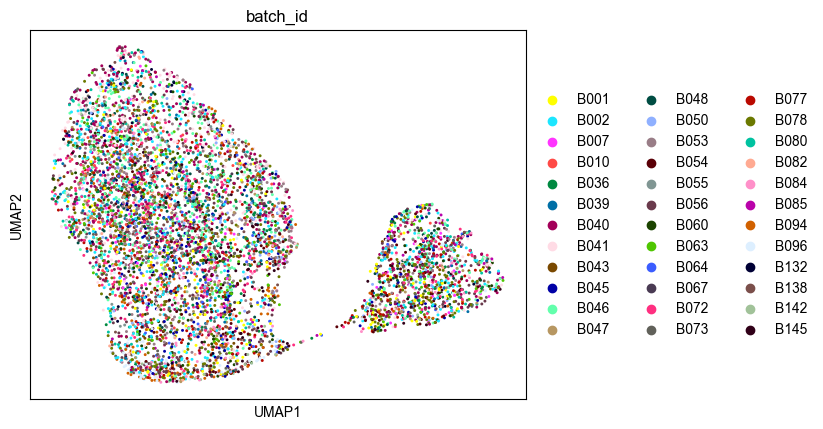

In [21]:
from adata_hf_datasets.pp.utils import consolidate_low_frequency_categories
import scanpy as sc

adata_cut = consolidate_low_frequency_categories(adata, "batch_id", 0, remove=True)

sc.pp.neighbors(adata_cut, use_rep="X_gs")
sc.tl.umap(adata_cut)
sc.pl.umap(adata_cut, color="batch_id")

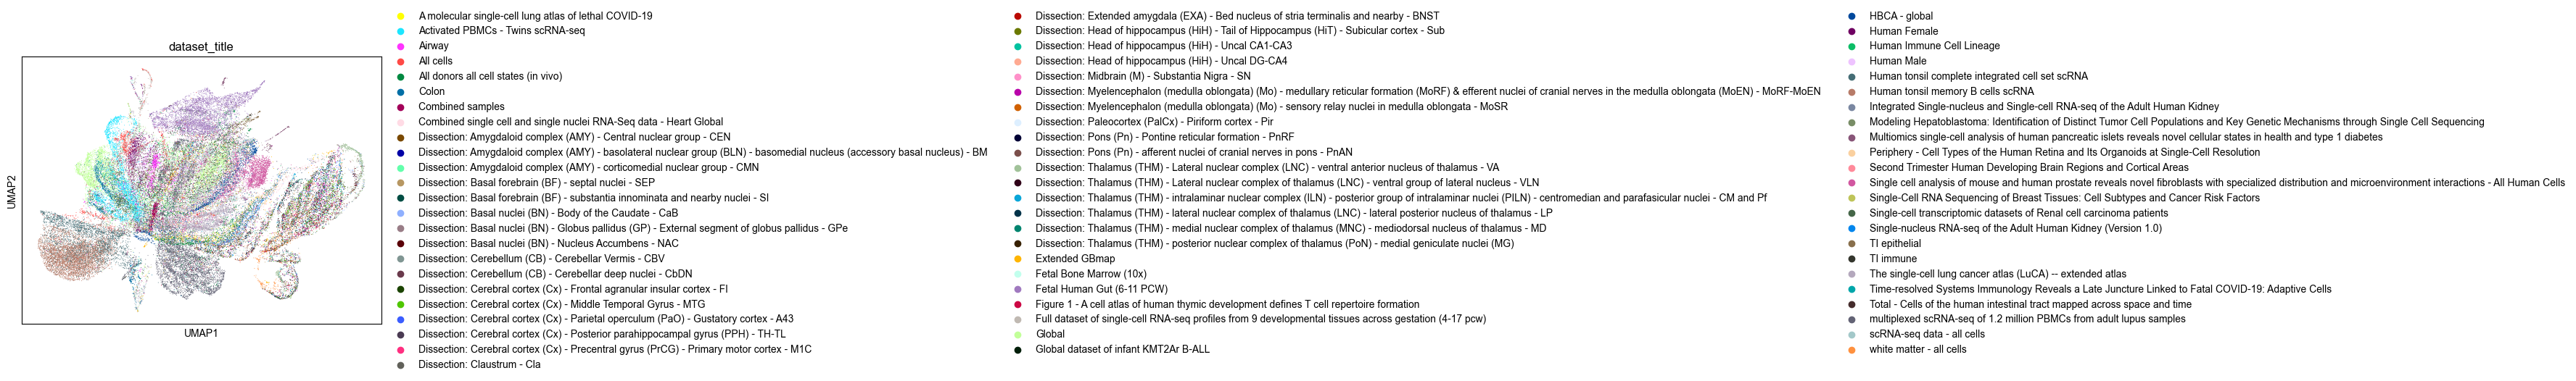

In [7]:
from adata_hf_datasets.pp.utils import consolidate_low_frequency_categories
import scanpy as sc

adata_cut = consolidate_low_frequency_categories(
    adata, "dataset_title", 200, remove=True
)

sc.pp.neighbors(adata_cut, use_rep="X_gs")
sc.tl.umap(adata_cut)
sc.pl.umap(adata_cut, color="dataset_title")

## The previous approach: Problem was that fitting scvi on the training data and later on the inference data is neither coherent nor a use that aligns with a foundation model approach that is aimed for.

In [3]:
adata = anndata.read_h5ad("../data/demo/rna_seq.h5ad")

In [69]:
from adata_hf_datasets.initial_embedder import InitialEmbedder

embedder = InitialEmbedder(method="scvi")
embedder.fit(adata, batch_key="study")
adata = embedder.embed(adata)

2025-02-11 13:36:08,947 - adata_hf_datasets.initial_embedder - INFO - Fitting method 'scvi' with embedding_dim=64
2025-02-11 13:36:08,947 - adata_hf_datasets.initial_embedder - INFO - Setting up scVI model with embedding_dim=64
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
2025-02-11 13:36:08,979 - adata_hf_datasets.initial_embedder - INFO - Training scVI model.
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically se

Training:   0%|          | 0/10 [00:00<?, ?it/s]

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].

In [70]:
adata.obsm["X_scvi"]

array([[ 0.0174264 ,  0.13381286,  0.2123419 , ..., -0.02693812,
        -0.5777042 , -0.19374533],
       [ 0.19993295, -0.33171532,  0.5399544 , ..., -1.2446675 ,
        -0.51235235, -0.26110113],
       [ 0.01079873, -0.02964801,  0.28322223, ..., -0.7336697 ,
        -0.85904235,  0.12404964],
       ...,
       [ 0.01999943, -1.40511   ,  1.8408469 , ..., -3.3454187 ,
        -1.9526563 ,  0.04684396],
       [-0.24815464,  0.2701683 ,  0.01768555, ..., -0.2796876 ,
        -0.95797986,  0.03571127],
       [-0.02856737, -0.51765317,  0.5305606 , ..., -1.3493755 ,
        -1.2734039 ,  0.3960248 ]], dtype=float32)

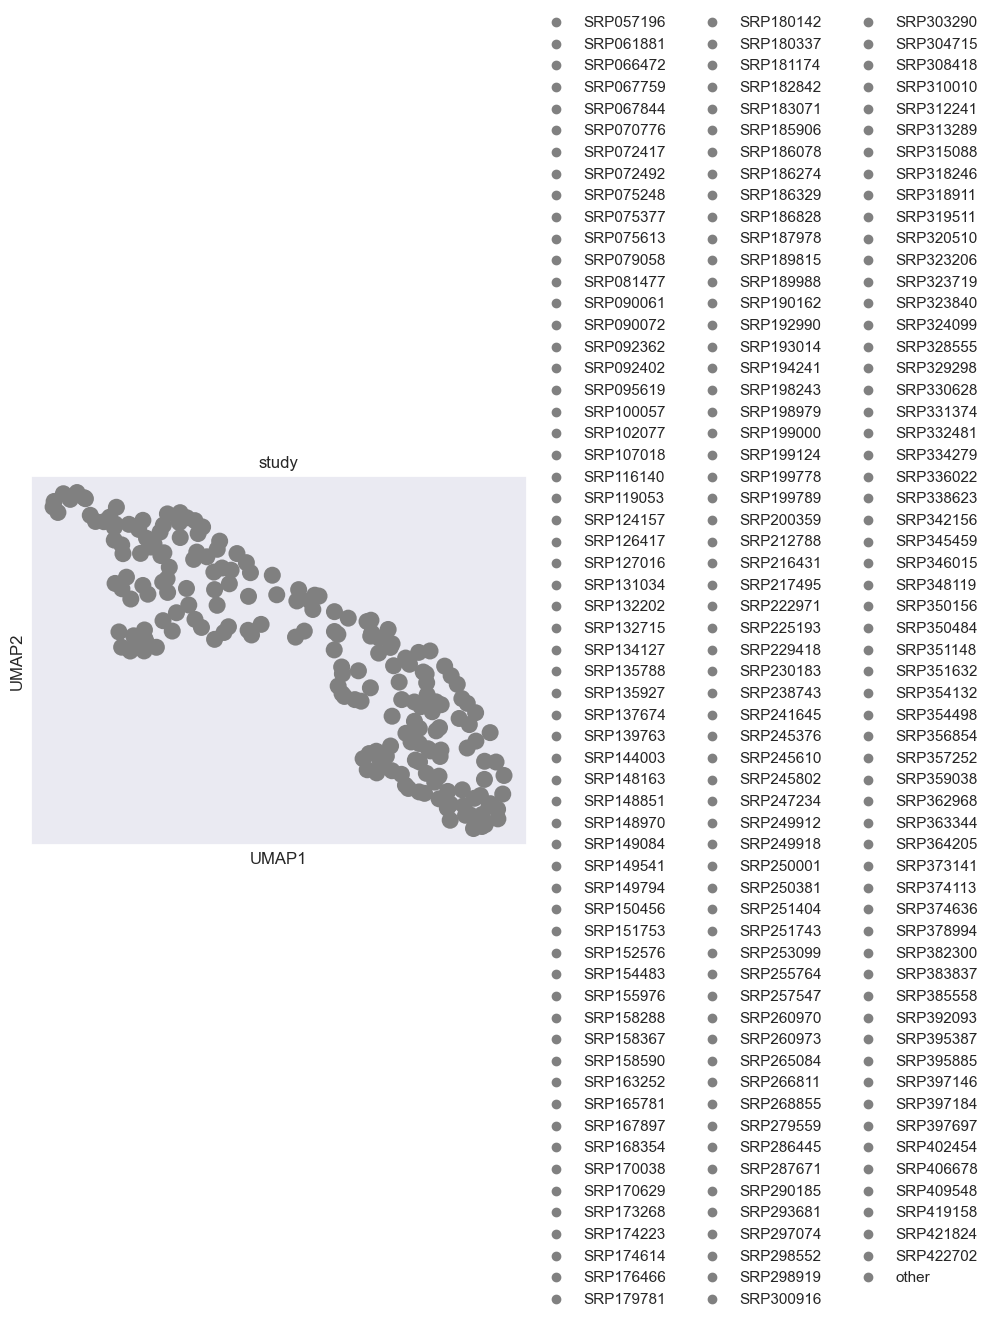

In [72]:
import scanpy as sc

sc.pp.neighbors(adata, use_rep="X_scvi")
sc.tl.umap(adata)
sc.pl.umap(adata, color="study")

In [10]:
adata = anndata.read_h5ad("../data/demo/rna_seq.h5ad", backed="r")